# Titanic Dataset EDA

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
titan = sns.load_dataset('titanic')

In [6]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Basic EDA

In [4]:
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
print(titan.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [16]:
titan['age'].fillna(titan['age'].mean(), inplace=True)
titan['embarked'].fillna(method='ffill', inplace=True)
titan['deck'].fillna(titan['deck'].mode()[0], inplace=True)
titan['embark_town'].fillna(method='ffill', inplace=True)
print(titan.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [40]:
print(titan.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Data Visualization

### Countplot

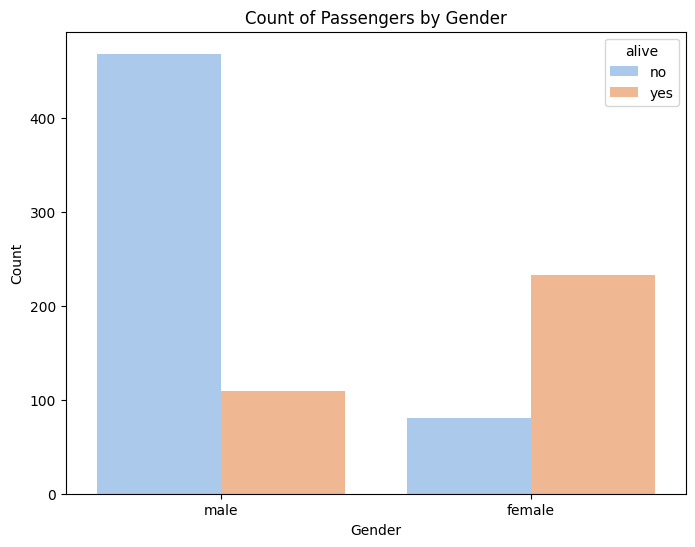

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titan, palette='pastel',hue='alive')
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

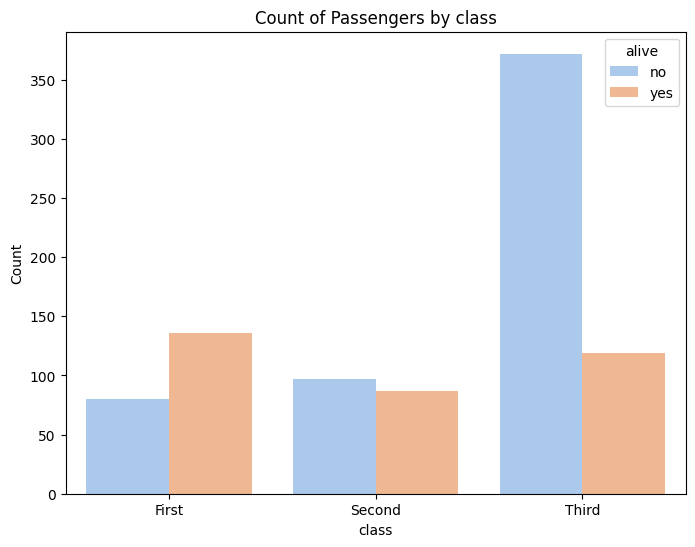

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titan, palette='pastel',hue='alive')
plt.title('Count of Passengers by class')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

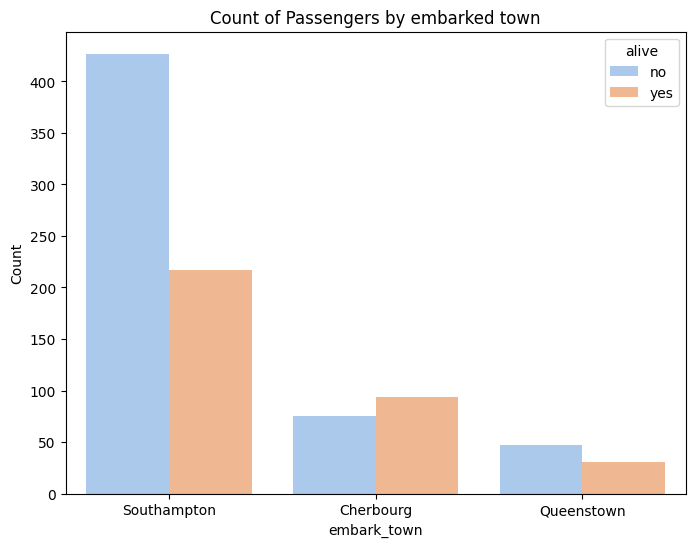

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='embark_town', data=titan, palette='pastel',hue='alive')
plt.title('Count of Passengers by embarked town')
plt.xlabel('embark_town')
plt.ylabel('Count')
plt.show()

### Heatmap

<Axes: xlabel='survived', ylabel='pclass'>

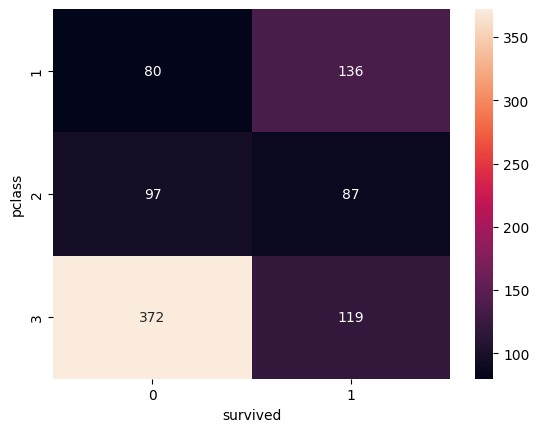

In [45]:
# Group the dataset by Pclass and Survived and then unstack them
group = titan.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

### Violinplot

<Axes: xlabel='sex', ylabel='age'>

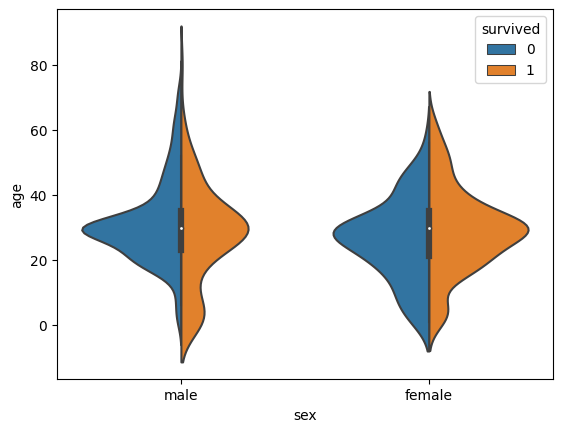

In [47]:
# Violinplot: Displays distribution of data across all levels of a category.
sns.violinplot(x ="sex", y ="age", hue ="survived", data = titan, split = True)

### Catplot

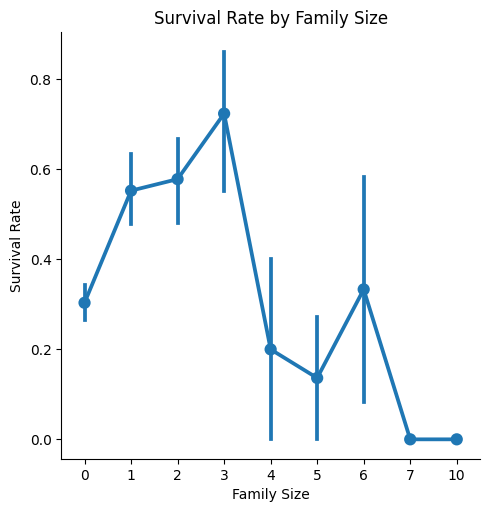

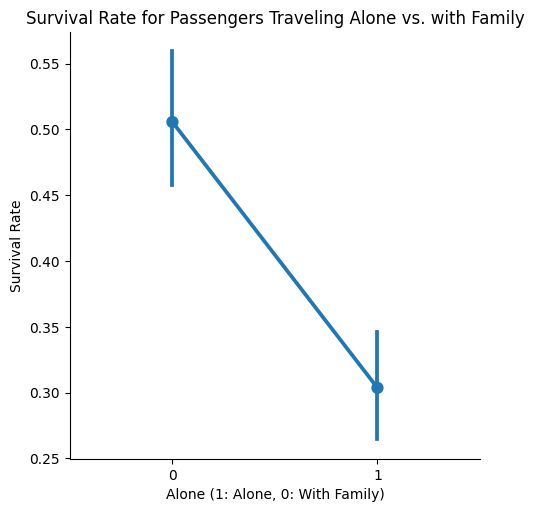

In [62]:
# Adding a column Family_Size
titan['family_Size'] = titan['parch'] + titan['sibsp']

# Adding a column Alone
titan['alone'] = 0
titan.loc[titan['family_Size'] == 0, 'alone'] = 1

# Catplot for Family_Size
sns.catplot(x='family_Size', y='survived', data=titan, kind='point')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Catplot for Alone
sns.catplot(x='alone', y='survived', data=titan, kind='point')
plt.title('Survival Rate for Passengers Traveling Alone vs. with Family')
plt.xlabel('Alone (1: Alone, 0: With Family)')
plt.ylabel('Survival Rate')
plt.show()

### Bar Plot for Fare (Continuous Feature)  

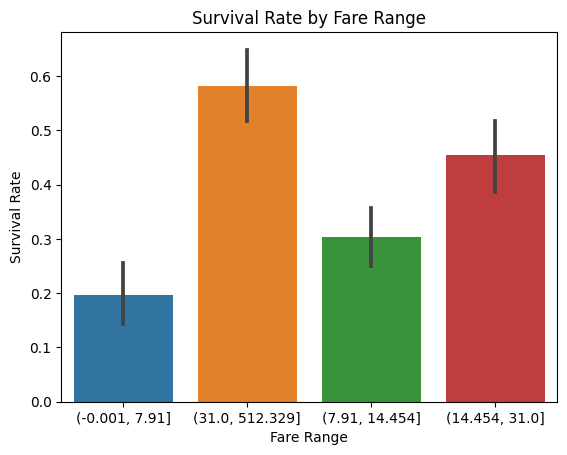

In [54]:
# Divide Fare into 4 bins
titan['fare_Range'] = pd.qcut(titan['fare'], 4)
 
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x='fare_Range', y='survived', data=titan, order=titan['fare_Range'].unique())
plt.title('Survival Rate by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.show()

### Categorical Count Plots for Embarked Feature 

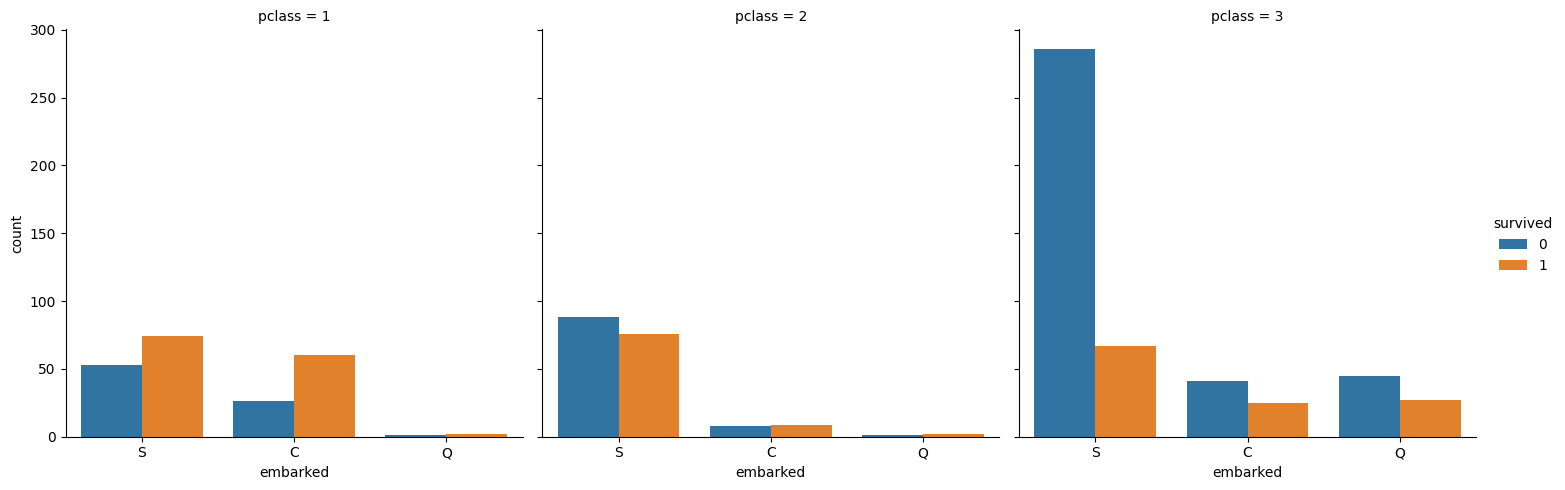

In [56]:
# Countplot
sns.catplot(x ='embarked', hue ='survived', kind ='count', col ='pclass', data = titan)

### Histogram

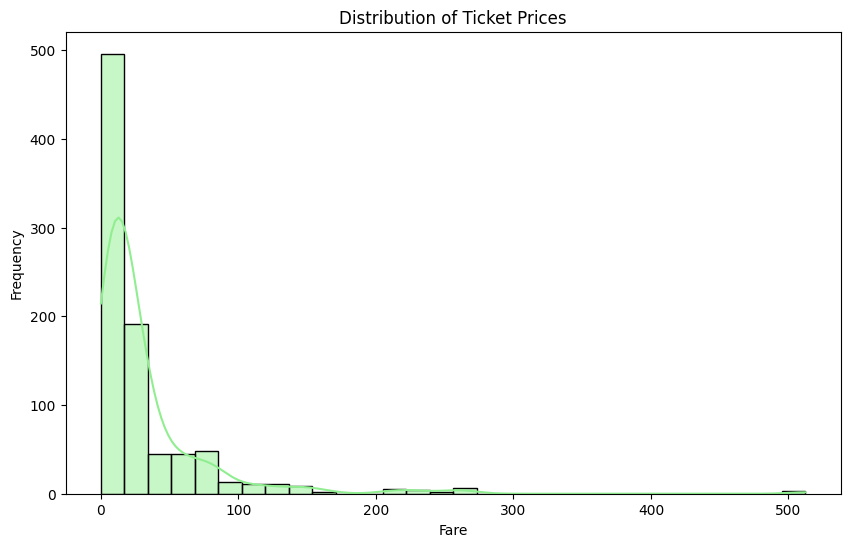

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(titan['fare'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()